In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve

In [2]:
# Import data
df = pd.read_csv('cleaned_data.csv')

# Subset the input variables to only the most important
# df = df.drop(['flag4'], 1)

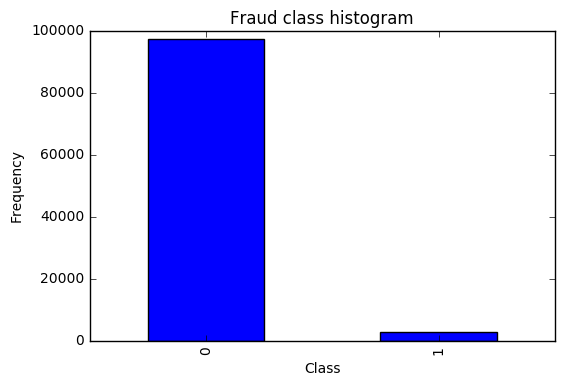

In [3]:
# Check the balance of the data set
count_classes = pd.value_counts(df['fraud'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Split the data frame into input and target data frames
X = df.ix[:, df.columns != 'fraud']
y = df.ix[:, df.columns == 'fraud']

In [5]:
# Shuffle and partition our data into 80% train data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Use undersampling to create a balanced set
# Number of data points in the minority class
number_records_fraud = len(y_train[y_train['fraud'] == 1])
fraud_indices = np.array(y_train[y_train['fraud'] == 1].index)

# Picking the indices of the normal classes
normal_indices = y_train[y_train['fraud'] == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'fraud']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'fraud']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data['fraud'] == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data['fraud'] == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  4240


In [7]:
# # Shuffle and partition our data into 80% train data and 20% test data.
# X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.2)

In [8]:
# Choosing which model to use for our data
clf = RandomForestClassifier(n_estimators=100)
# clf = LogisticRegression(C = 0.01, penalty = 'l1')
# clf = tree.DecisionTreeClassifier()

# Training the data
clf.fit(X_undersample, y_undersample)

# Scoring the model
accuracy = clf.score(X_test, y_test)

# Printing the score of the model
print(accuracy)

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8277


In [9]:
# Predicting the test data
y_pred = np.array(clf.predict(X_test))
y_test = np.array(y_test)
y_test.resize(len(y_pred))

# Displaying a confusion matrix
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(df_confusion)

Predicted      0     1
Actual                
0          16168  3298
1            148   386


In [10]:
sensitivity = (df_confusion[1][1] / (df_confusion[1][1] + df_confusion[0][1])) * 100
specificity = (df_confusion[0][0] / (df_confusion[1][0] + df_confusion[0][0])) * 100
accuracy *= 100
print('Sensitivity: %s' % sensitivity)
print('Specificity: %s' % specificity)
print('Accuracy: %s' % accuracy)

Sensitivity: 72.2846441948
Specificity: 83.0576389602
Accuracy: 82.77


In [11]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.776711415775


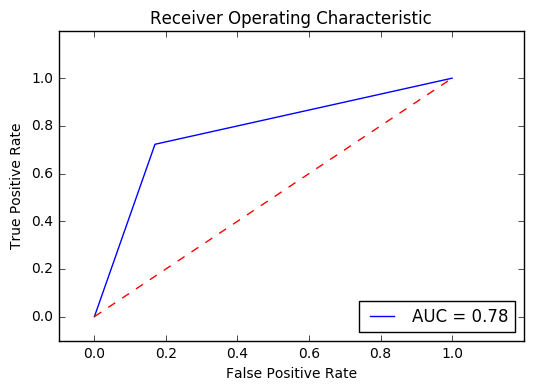

In [12]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()